<a href="https://colab.research.google.com/github/SHASHANK8412/IRIS/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2649635160.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


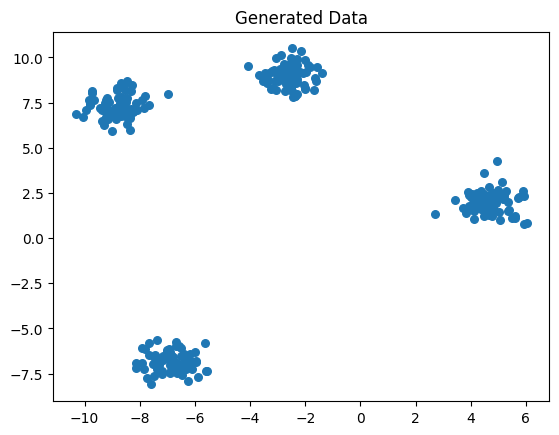

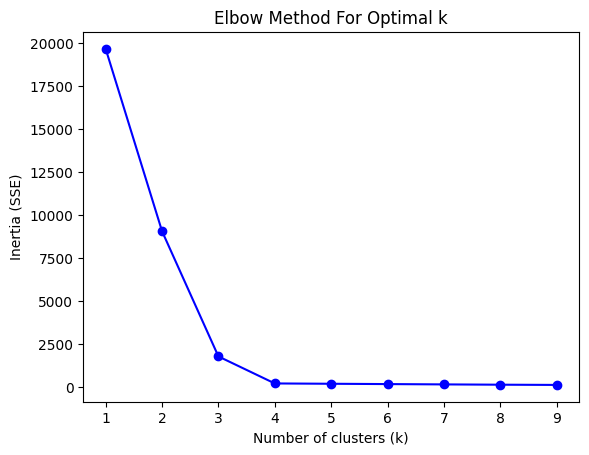

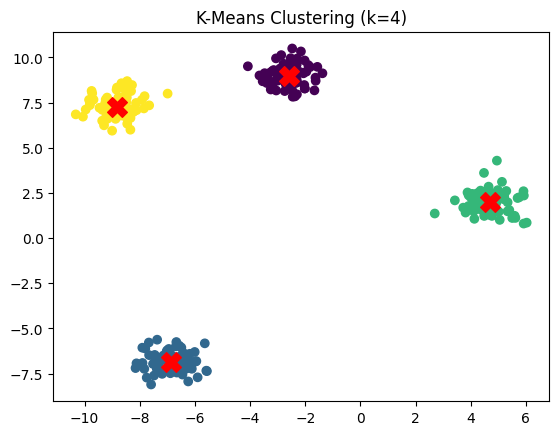

In [ ]:
#K-means Clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import jaccard

# 1. Generate Sample Dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title("Generated Data")
plt.show()


# 2. Elbow Method
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()


# 3. Apply KMeans with optimal k (say 4)
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='red', marker='X') # centroids
plt.title("K-Means Clustering (k=4)")
plt.show()










In [ ]:
# Distance / Similarity Measures

p1 = np.array([1, 2])
p2 = np.array([4, 6])

# Euclidean Distance
euclidean = np.linalg.norm(p1 - p2)

# Manhattan Distance
manhattan = np.sum(np.abs(p1 - p2))

# Cosine Similarity
cosine = 1 - pairwise_distances([p1], [p2], metric='cosine')[0][0]

# Minkowski Distance (p=3 example)
minkowski = np.sum(np.abs(p1 - p2)**3)**(1/3)

# Jaccard Index (convert to binary sets for demonstration)
set1 = np.array([1,1,0,1,0])
set2 = np.array([1,0,1,1,0])
jaccard_index = 1 - jaccard(set1, set2)

print("Distance / Similarity Measures:")
print(f"Euclidean Distance: {euclidean:.4f}")
print(f"Manhattan Distance: {manhattan:.4f}")
print(f"Cosine Similarity: {cosine:.4f}")
print(f"Minkowski Distance (p=3): {minkowski:.4f}")
print(f"Jaccard Index: {jaccard_index:.4f}")


Distance / Similarity Measures:
Euclidean Distance: 5.0000
Manhattan Distance: 7.0000
Cosine Similarity: 0.9923
Minkowski Distance (p=3): 4.4979
Jaccard Index: 0.5000


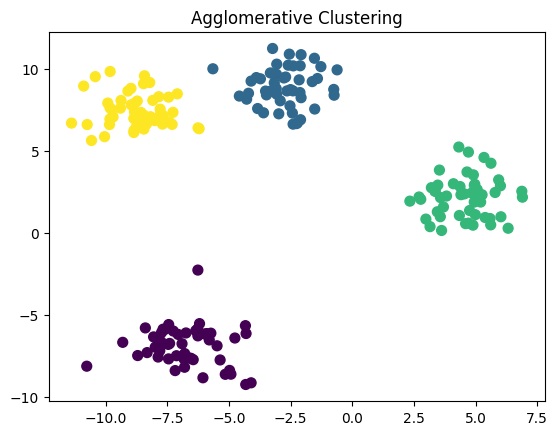

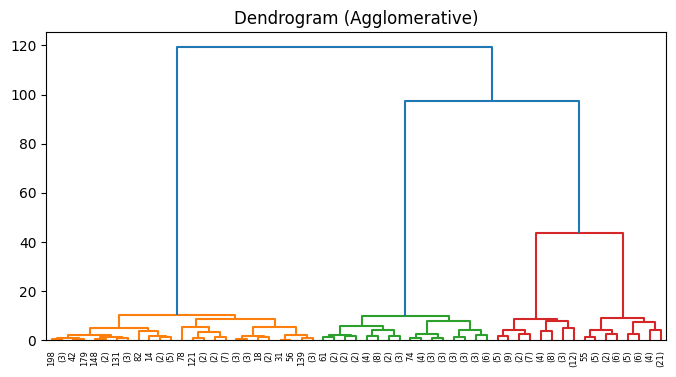

In [ ]:
#1. Agglomerative Clustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate sample data
X, y = make_blobs(n_samples=200, centers=4, cluster_std=1.2, random_state=42)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_pred = agg.fit_predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="viridis", s=50)
plt.title("Agglomerative Clustering")
plt.show()

# Dendrogram
linked = linkage(X, method='ward')
plt.figure(figsize=(8, 4))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram (Agglomerative)")
plt.show()





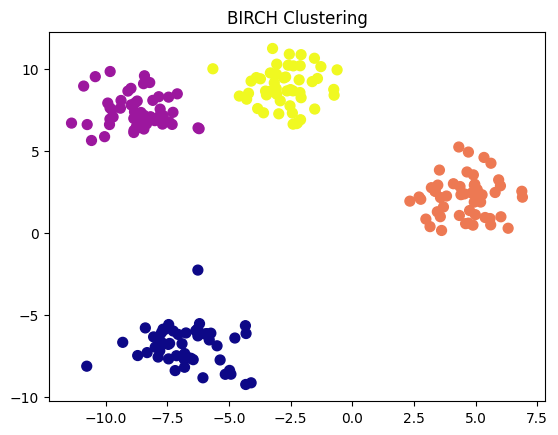

In [ ]:
#2.BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)
from sklearn.cluster import Birch

# Birch Clustering
birch = Birch(n_clusters=4)
y_birch = birch.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y_birch, cmap="plasma", s=50)
plt.title("BIRCH Clustering")
plt.show()



Initial clusters from graph: 3


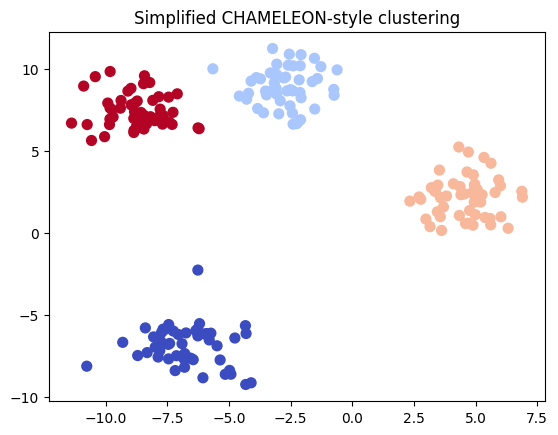

In [ ]:
# 3. CHAMELEON Clustering (Simplified Prototype)
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering

# Build KNN Graph
knn_graph = kneighbors_graph(X, n_neighbors=10, include_self=False)
G = nx.from_scipy_sparse_array(knn_graph)

# Connected components = initial clusters
components = list(nx.connected_components(G))
print(f"Initial clusters from graph: {len(components)}")

# For simplicity, run Agglomerative Clustering using graph-based distances
agg_chameleon = AgglomerativeClustering(
    n_clusters=4,
    linkage="average",
    metric="euclidean"   # ✅ use metric instead of affinity
)
y_chameleon = agg_chameleon.fit_predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_chameleon, cmap="coolwarm", s=50)
plt.title("Simplified CHAMELEON-style clustering")
plt.show()



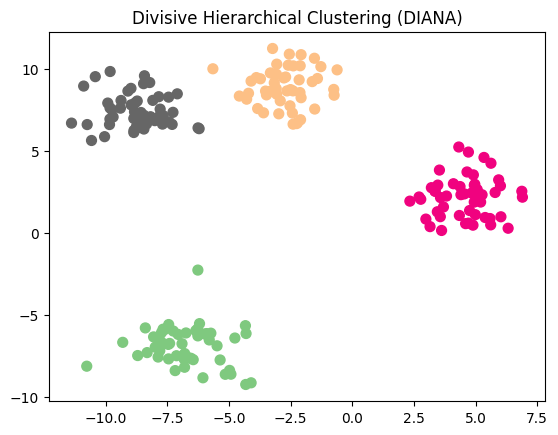

In [ ]:
#4. Divisive Hierarchical Clustering (DIANA algorithm)
from sklearn.cluster import KMeans

def divisive_clustering(X, max_clusters=4):
    clusters = {0: X}
    labels = np.zeros(len(X), dtype=int)
    current_cluster = 0
    next_label = 1

    while len(clusters) < max_clusters:
        # Take largest cluster and split
        cluster_data = clusters[current_cluster]
        kmeans = KMeans(n_clusters=2, random_state=42).fit(cluster_data)

        new_labels = kmeans.labels_
        mask = (labels == current_cluster)

        # Assign new cluster labels
        labels[mask] = np.where(new_labels == 0, current_cluster, next_label)

        # Update clusters
        clusters[current_cluster] = cluster_data[new_labels == 0]
        clusters[next_label] = cluster_data[new_labels == 1]

        next_label += 1
        current_cluster = max(clusters, key=lambda c: len(clusters[c]))

    return labels

# Run Divisive Clustering
y_div = divisive_clustering(X, max_clusters=4)

plt.scatter(X[:, 0], X[:, 1], c=y_div, cmap="Accent", s=50)
plt.title("Divisive Hierarchical Clustering (DIANA)")
plt.show()


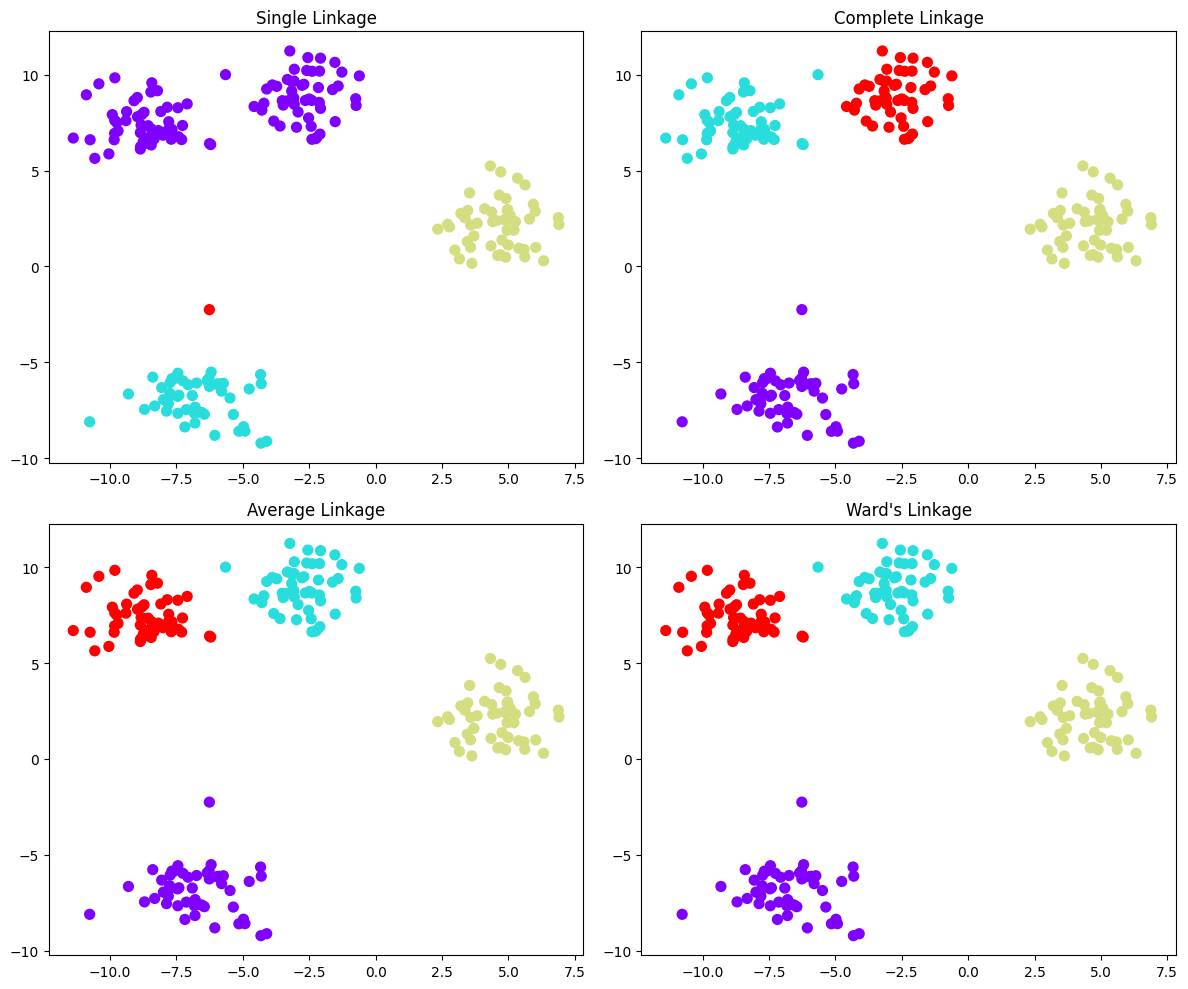

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Sample dataset
X, _ = make_blobs(n_samples=200, centers=4, cluster_std=1.2, random_state=42)

linkages = {
    "Single Linkage": "single",
    "Complete Linkage": "complete",
    "Average Linkage": "average",
    "Ward's Linkage": "ward"
}

plt.figure(figsize=(12, 10))

for i, (name, method) in enumerate(linkages.items(), 1):
    if method == "ward":
        clustering = AgglomerativeClustering(n_clusters=4, linkage="ward")
    else:
        clustering = AgglomerativeClustering(n_clusters=4, linkage=method, metric="euclidean")

    labels = clustering.fit_predict(X)

    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="rainbow", s=50)
    plt.title(name)

plt.tight_layout()
plt.show()


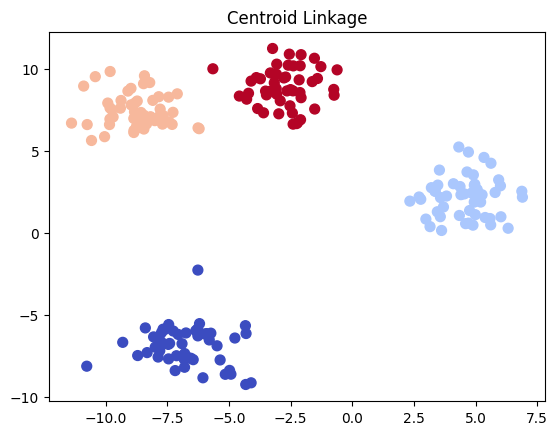

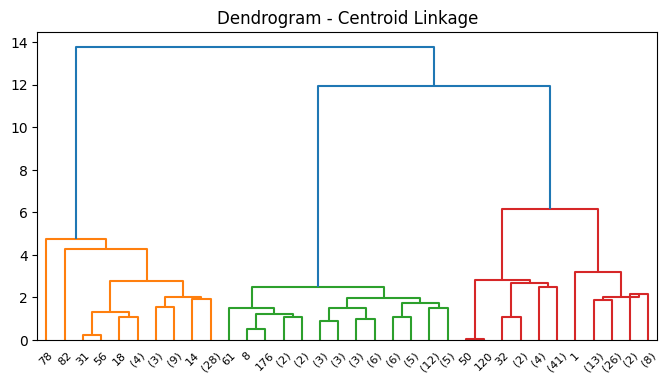

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np

# Centroid Linkage using SciPy
Z = linkage(X, method="centroid")
labels = fcluster(Z, t=4, criterion="maxclust")

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="coolwarm", s=50)
plt.title("Centroid Linkage")
plt.show()

# Optional: Dendrogram for Centroid
plt.figure(figsize=(8, 4))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Dendrogram - Centroid Linkage")
plt.show()


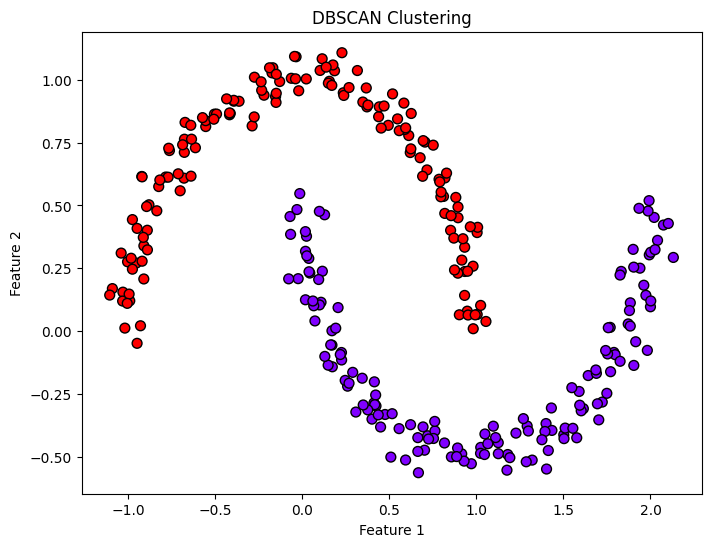

Unique cluster labels (including -1 for noise): [0 1]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# -----------------------------
# 1. Create dataset
# -----------------------------
# Using non-convex shape to show DBSCAN advantage
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# -----------------------------
# 2. Apply DBSCAN
# -----------------------------
dbscan = DBSCAN(
    eps=0.2,          # Maximum distance between points to be considered neighbors
    min_samples=5,    # Minimum number of points to form a dense region
    metric='euclidean'
)

labels = dbscan.fit_predict(X)

# -----------------------------
# 3. Visualize clusters
# -----------------------------
plt.figure(figsize=(8,6))
# DBSCAN labels -1 as noise points
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=50, edgecolor='k')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Optional: Print unique cluster labels
print("Unique cluster labels (including -1 for noise):", np.unique(labels))


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


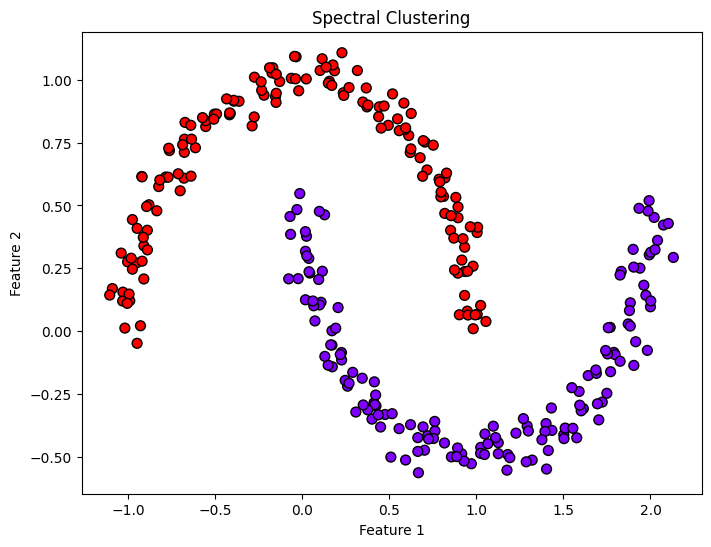

In [ ]:
#Implement Spectral Clustering
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

# -----------------------------
# 1. Create dataset
# -----------------------------
# Using non-convex shape to show Spectral Clustering advantage
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# -----------------------------
# 2. Apply Spectral Clustering
# -----------------------------
spectral = SpectralClustering(
    n_clusters=2,                  # Number of clusters
    affinity='nearest_neighbors',   # Similarity graph
    assign_labels='kmeans',         # Label assignment method
    random_state=42
)

labels = spectral.fit_predict(X)

# -----------------------------
# 3. Visualize clusters
# -----------------------------
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=50, edgecolor='k')
plt.title("Spectral Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
